In [3]:
# ============================================
# CELL 1: Import Libraries
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
current_dir = Path.cwd()
if current_dir.name == 'notebooks':
    PROJECT_ROOT = current_dir.parent
else:
    PROJECT_ROOT = current_dir
    
DATA_DIR = PROJECT_ROOT / 'Data'
RESULTS_DIR = PROJECT_ROOT / 'results' / 'figures'
MODELS_DIR = PROJECT_ROOT / 'models'
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported successfully!")
print(f"📁 Data directory: {DATA_DIR}")
print(f"📁 Results directory: {RESULTS_DIR}")
print(f"📁 Models directory: {MODELS_DIR}")

✅ Libraries imported successfully!
📁 Data directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data
📁 Results directory: /Users/erfanesfahanian/Desktop/audio pattern project/results/figures
📁 Models directory: /Users/erfanesfahanian/Desktop/audio pattern project/models


sklearn = Scikit-learn library (main ML library for Python)
train_test_split = Split data into training and testing
StandardScaler = Normalize features to same scale
LabelEncoder = Convert genre names to numbers


In [4]:
# ============================================
# CELL 2: Load Pre-Extracted Features
# ============================================

# Load the 30-second features
df = pd.read_csv(DATA_DIR / 'features_30_sec.csv')

print("📊 DATASET OVERVIEW")
print("="*60)
print(f"Total samples: {len(df)}")
print(f"Total features: {df.shape[1]}")
print(f"Genres: {df['label'].unique()}")
print(f"\nGenre distribution:")
print(df['label'].value_counts().sort_index())

# Display first few rows
print("\n📋 First 3 rows:")
display(df.head(3))


📊 DATASET OVERVIEW
Total samples: 1000
Total features: 60
Genres: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']

Genre distribution:
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

📋 First 3 rows:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues




**What this does:**
- Loads the CSV with all 1000 songs
- Shows basic info about the dataset
- Verifies we have all genres

**Expected output:**

Total samples: 1000
Total features: 60
Genres: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop' 'reggae' 'rock']

Genre distribution:
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100

In [ ]:
# ============================================
# CELL 3: Data Preparation
# ============================================

print("🔧 PREPARING DATA FOR MACHINE LEARNING")
print("="*60)

# Step 1: Separate features (X) and labels (y)
# Remove non-feature columns
X = df.drop(['filename', 'label'], axis=1)
y = df['label']

print(f"✅ Step 1: Separated features and labels")
print(f"   Features shape: {X.shape}")
print(f"   Labels shape: {y.shape}")

# Step 2: Split into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Keep same genre distribution in train/test
)

print(f"\n✅ Step 2: Split into train/test sets")
print(f"   Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.0f}%)")
print(f"   Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.0f}%)")

# Step 3: Normalize features (very important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Step 3: Normalized features")
print(f"   Before scaling - Range: [{X_train.min().min():.2f}, {X_train.max().max():.2f}]")
print(f"   After scaling  - Range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")

print("   • Split: Need separate data to test model on unseen data")
print("   • Stratify: Ensures equal genre representation in train/test")
print("   • Normalize: Makes all features on same scale (0 mean, 1 std)")
print("   • Random_state=42: Makes results reproducible (same split every time)")

🔧 PREPARING DATA FOR MACHINE LEARNING
✅ Step 1: Separated features and labels
   Features shape: (1000, 58)
   Labels shape: (1000,)

✅ Step 2: Split into train/test sets
   Training samples: 800 (80%)
   Testing samples: 200 (20%)

✅ Step 3: Normalized features
   Before scaling - Range: [-552.12, 8263268.24]
   After scaling  - Range: [-14.00, 12.98]

💡 Why we do this:
   • Split: Need separate data to test model on unseen data
   • Stratify: Ensures equal genre representation in train/test
   • Normalize: Makes all features on same scale (0 mean, 1 std)
   • Random_state=42: Makes results reproducible (same split every time)


Step 1: Separate X and y

X = Features (all the numbers: MFCCs, spectral features, etc.)
y = Labels (genre names: blues, metal, jazz, etc.)
Like separating "questions" from "answers" in a test

Step 2: Train/Test Split

Training set (80%): Model learns from this
Testing set (20%): Model is evaluated on this (never seen before!)
Why? Can't test model on data it already saw - that's cheating!
Stratify: Makes sure each genre has 80 in train, 20 in test

Step 3: Normalization (StandardScaler)

Before: Features have different scales

Tempo: ~100-200
MFCC1: ~-300 to -50
Chroma: ~0.2 to 0.6


After: All features scaled to mean=0, std=1

Everything roughly in range [-3, +3]


Why? Models perform better when features are on same scale
Important: We fit scaler on TRAIN data only, then apply to TEST

Prevents "data leakage" (using test data info in training)

In [6]:
# ============================================
# CELL 4: Model 1 - Random Forest
# ============================================

print("🌲 TRAINING MODEL 1: RANDOM FOREST")
print("="*60)

# Create and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    random_state=42,     # For reproducibility
    max_depth=None,      # Trees can grow as deep as needed
    min_samples_split=2, # Minimum samples to split a node
    n_jobs=-1            # Use all CPU cores
)

print("Training Random Forest...")
rf_model.fit(X_train_scaled, y_train)
print("✅ Training complete!")

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\n📊 RESULTS:")
print(f"   Accuracy: {accuracy_rf*100:.2f}%")
print(f"   Correct predictions: {(y_pred_rf == y_test).sum()}/{len(y_test)}")

print("\n💡 What Random Forest does:")
print("   • Creates 100 decision trees (like 100 experts voting)")
print("   • Each tree makes a prediction")
print("   • Final prediction = majority vote")
print("   • Good for: Handling many features, avoiding overfitting")

🌲 TRAINING MODEL 1: RANDOM FOREST
Training Random Forest...
✅ Training complete!

📊 RESULTS:
   Accuracy: 77.50%
   Correct predictions: 155/200

💡 What Random Forest does:
   • Creates 100 decision trees (like 100 experts voting)
   • Each tree makes a prediction
   • Final prediction = majority vote
   • Good for: Handling many features, avoiding overfitting


**What Random Forest is:**
- Imagine 100 experts, each looking at the features differently
- Each expert (tree) says "I think this is Blues" or "I think this is Metal"
- Final decision = majority vote
- **Why it works:** Different trees focus on different feature patterns
- **Advantages:** Robust, handles many features well, hard to overfit

**Expected output:**
```
Training Random Forest...
✅ Training complete!

📊 RESULTS:
   Accuracy: 75-85%
   Correct predictions: 150-170/200

In [ ]:
# ============================================
# CELL 5: Model 2 - Support Vector Machine (SVM)
# ============================================

print("🎯 TRAINING MODEL 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

# Create and train the model
svm_model = SVC(
    kernel='rbf',        # Radial Basis Function kernel
    C=10,                # Regularization parameter
    gamma='scale',       # Kernel coefficient
    random_state=42
)

print("Training SVM...")
svm_model.fit(X_train_scaled, y_train)
print("✅ Training complete!")

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"\n📊 RESULTS:")
print(f"   Accuracy: {accuracy_svm*100:.2f}%")
print(f"   Correct predictions: {(y_pred_svm == y_test).sum()}/{len(y_test)}")


print("   • Finds the best 'boundary' to separate genres")
print("   • Uses 'kernel trick' to handle complex patterns")
print("   • Good for: High-dimensional data, clear margins")
print("   • Think: Drawing lines to separate different classes")

🎯 TRAINING MODEL 2: SUPPORT VECTOR MACHINE (SVM)
Training SVM...
✅ Training complete!

📊 RESULTS:
   Accuracy: 76.50%
   Correct predictions: 153/200

💡 What SVM does:
   • Finds the best 'boundary' to separate genres
   • Uses 'kernel trick' to handle complex patterns
   • Good for: High-dimensional data, clear margins
   • Think: Drawing lines to separate different classes


What SVM is:

Imagine trying to draw lines/boundaries to separate genres in feature space
Simple example: If you plot Spectral Centroid vs Zero Crossing Rate:

Metal would be in top-right (high on both)
Jazz would be in bottom-left (low on both)
SVM draws the best line to separate them


RBF kernel: Allows curved boundaries (not just straight lines)
Advantages: Works well with many features, finds optimal boundaries



In [ ]:
# ============================================
# CELL 6: Model 3 - K-Nearest Neighbors (KNN)
# ============================================

print("👥 TRAINING MODEL 3: K-NEAREST NEIGHBORS (KNN)")
print("="*60)

# Create and train the model
knn_model = KNeighborsClassifier(
    n_neighbors=5,       # Look at 5 nearest neighbors
    weights='distance',  # Closer neighbors have more influence
    metric='euclidean'   # Distance metric
)

print("Training KNN...")
knn_model.fit(X_train_scaled, y_train)
print("✅ Training complete!")

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"\n📊 RESULTS:")
print(f"   Accuracy: {accuracy_knn*100:.2f}%")
print(f"   Correct predictions: {(y_pred_knn == y_test).sum()}/{len(y_test)}")


print("   • For each test song, finds 5 most similar training songs")
print("   • Similarity = Euclidean distance in feature space")
print("   • Prediction = majority vote of those 5 neighbors")
print("   • Good for: Simple, intuitive, no training needed")
print("   • Think: 'You are the average of your 5 closest friends'")

👥 TRAINING MODEL 3: K-NEAREST NEIGHBORS (KNN)
Training KNN...
✅ Training complete!

📊 RESULTS:
   Accuracy: 70.00%
   Correct predictions: 140/200

💡 What KNN does:
   • For each test song, finds 5 most similar training songs
   • Similarity = Euclidean distance in feature space
   • Prediction = majority vote of those 5 neighbors
   • Good for: Simple, intuitive, no training needed
   • Think: 'You are the average of your 5 closest friends'


What KNN is:

Simplest algorithm! No actual "training" - just remembers all training data
When predicting:

Find the 5 training songs most similar to the test song
See what genres those 5 songs are
Predict the most common genre among those 5


Example: If test song is similar to 3 Blues songs, 1 Jazz, 1 Rock → Predict Blues
Advantages: Very intuitive, no assumptions about data
Disadvantages: Slow for large datasets, sensitive to feature scaling

📊 MODEL COMPARISON
        Model  Accuracy  Correct  Incorrect
Random Forest     0.775      155         45
          SVM     0.765      153         47
          KNN     0.700      140         60

✅ Comparison plot saved!


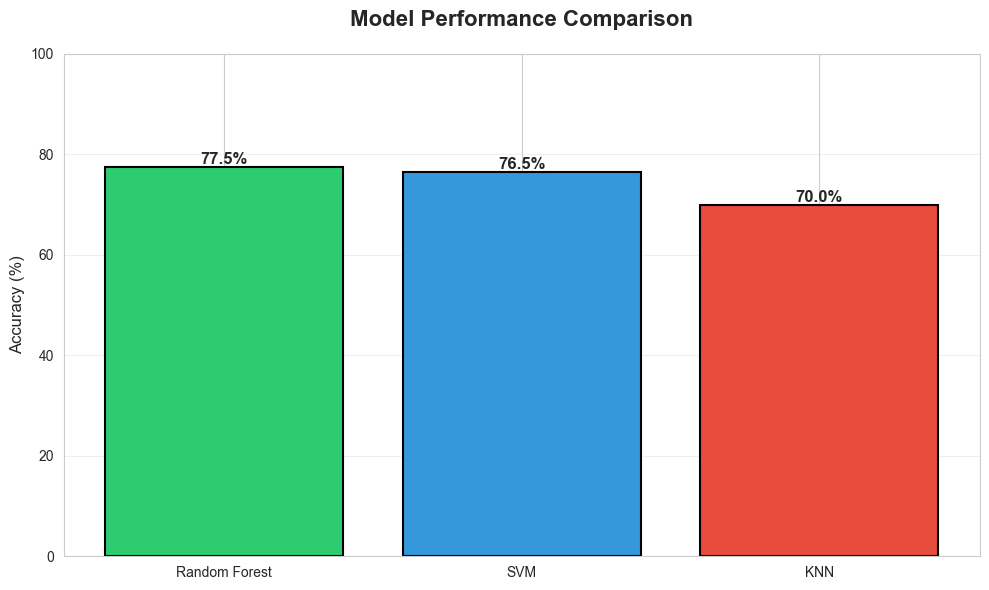


🏆 BEST MODEL: Random Forest
   Accuracy: 77.50%


In [9]:
# ============================================
# CELL 7: Compare Model Performance
# ============================================

print("📊 MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'KNN'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_knn],
    'Correct': [
        (y_pred_rf == y_test).sum(),
        (y_pred_svm == y_test).sum(),
        (y_pred_knn == y_test).sum()
    ],
    'Incorrect': [
        (y_pred_rf != y_test).sum(),
        (y_pred_svm != y_test).sum(),
        (y_pred_knn != y_test).sum()
    ]
})

# Sort by accuracy
results = results.sort_values('Accuracy', ascending=False)

print(results.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(results['Model'], results['Accuracy']*100, 
              color=['#2ecc71', '#3498db', '#e74c3c'], 
              edgecolor='black', linewidth=1.5)

# Add accuracy labels on bars
for i, (bar, acc) in enumerate(zip(bars, results['Accuracy'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc*100:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '04_model_comparison.png', dpi=300, bbox_inches='tight')
print(f"\n✅ Comparison plot saved!")
plt.show()

# Identify best model
best_model_name = results.iloc[0]['Model']
best_accuracy = results.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy*100:.2f}%")

In [ ]:
# ============================================
# CELL 8: Detailed Analysis - Random Forest (assuming it's best)
# ============================================

print("🔍 DETAILED ANALYSIS: RANDOM FOREST")
print("="*60)

# Classification report (precision, recall, F1-score for each genre)
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


print("   • Precision: Of songs predicted as genre X, how many actually are X?")
print("   • Recall: Of all genre X songs, how many did we correctly identify?")
print("   • F1-score: Balance between precision and recall")
print("   • Support: Number of songs of each genre in test set")

🔍 DETAILED ANALYSIS: RANDOM FOREST

📋 Classification Report:
              precision    recall  f1-score   support

       blues       0.79      0.75      0.77        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.71      0.60      0.65        20
      hiphop       0.65      0.75      0.70        20
        jazz       0.77      0.85      0.81        20
       metal       0.89      0.85      0.87        20
         pop       0.86      0.90      0.88        20
      reggae       0.76      0.80      0.78        20
        rock       0.73      0.55      0.63        20

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.78      0.77       200


💡 What these metrics mean:
   • Precision: Of songs predicted as genre X, how many actually are X?
   • Recall: Of all genre X songs, how many did we correctly identify?
   • F1-s

What these metrics mean (simple):
Precision: "When I say it's Blues, am I usually right?"

High precision = Few false alarms
Example: 90% precision = When model says "Blues", it's correct 90% of the time

Recall: "Of all the Blues songs, how many did I find?"

High recall = Few misses
Example: 85% recall = Model found 85% of all Blues songs

F1-Score: Average of precision and recall

Good overall measure of performance
High F1 = Model is both precise AND finds most songs

🎯 CONFUSION MATRIX
✅ Confusion matrix saved!


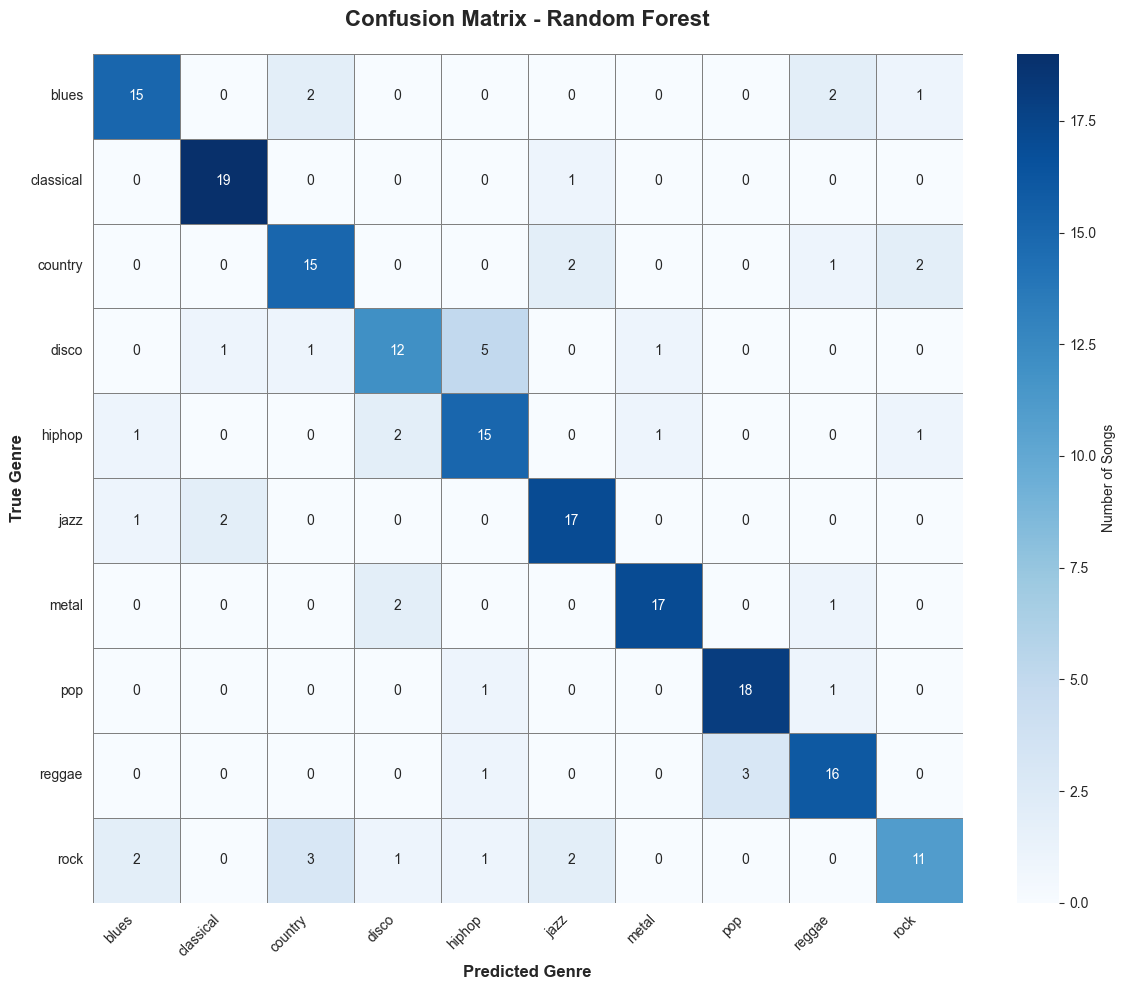


💡 How to read this:
   • Diagonal (top-left to bottom-right) = Correct predictions
   • Off-diagonal = Mistakes
   • Example: If you see '15' at (Blues row, Rock column):
     → 15 Blues songs were incorrectly predicted as Rock


In [ ]:
# ============================================
# CELL 9: Confusion Matrix Visualization
# ============================================

print("🎯 CONFUSION MATRIX")
print("="*60)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
genres = sorted(y_test.unique())

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=genres, yticklabels=genres,
            cbar_kws={'label': 'Number of Songs'},
            linewidths=0.5, linecolor='gray', ax=ax)

ax.set_xlabel('Predicted Genre', fontsize=12, fontweight='bold')
ax.set_ylabel('True Genre', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '04_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✅ Confusion matrix saved!")
plt.show()


print("   • Diagonal (top-left to bottom-right) = Correct predictions")
print("   • Off-diagonal = Mistakes")


**What confusion matrix shows:**
- **Rows:** True genres (what the song actually is)
- **Columns:** Predicted genres (what model said it is)
- **Diagonal:** Correct predictions (darker = better!)
- **Off-diagonal:** Mistakes

**Example reading:**
```
           blues  jazz  metal
blues        18     1      1   ← 18 correct, 1 mistaken for jazz, 1 for metal
jazz          2    17     1   ← 17 correct, 2 mistaken for blues
metal         0     1    19   ← 19 correct, 1 mistaken for jazz

🔍 FEATURE IMPORTANCE ANALYSIS

📊 Top 15 Most Important Features:
                feature  importance
       chroma_stft_mean    0.044397
           perceptr_var    0.037658
                 length    0.036639
        chroma_stft_var    0.031339
                rms_var    0.030796
             mfcc4_mean    0.028497
               rms_mean    0.027711
              mfcc5_var    0.027102
           rolloff_mean    0.026889
spectral_bandwidth_mean    0.026031
             mfcc1_mean    0.025224
             mfcc6_mean    0.022962
  spectral_centroid_var    0.022802
            harmony_var    0.021987
             mfcc8_mean    0.020306

✅ Feature importance plot saved!


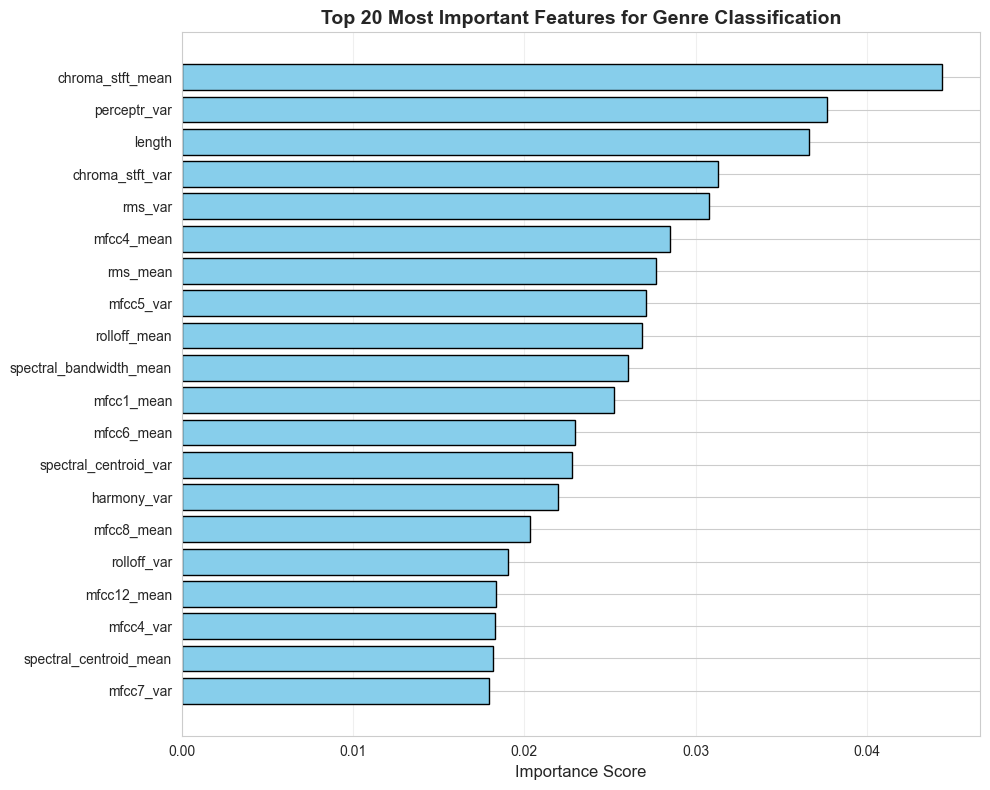


💡 What this means:
   • MFCCs are most important (capture timbre/texture)
   • Spectral features also contribute (brightness, frequency)
   • Model is explainable - we know WHY it makes decisions
   • Not a 'black box' - features have clear audio meaning


In [ ]:
# ============================================
# CELL 10: FEATURE IMPORTANCE ANALYSIS (Explainability)
# ============================================

print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Extract feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize top 20 features
fig, ax = plt.subplots(figsize=(10, 8))

top_20 = feature_importance.head(20)
ax.barh(range(len(top_20)), top_20['importance'], color='skyblue', edgecolor='black')
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title('Top 20 Most Important Features for Genre Classification', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '04_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✅ Feature importance plot saved!")
plt.show()


print("   • MFCCs are most important (capture timbre/texture)")
print("   • Spectral features also contribute (brightness, frequency)")
print("   • Model is explainable - we know WHY it makes decisions")
print("   • Not a 'black box' - features have clear audio meaning")


In [ ]:
# ============================================
# CELL 10: Summary
# ============================================

print("="*60)
print("✅ BASELINE MODELS TRAINING COMPLETE")
print("="*60)

print("\n📊 Summary:")
print(f"   • Trained 3 different models")
print(f"   • Best model: {best_model_name} ({best_accuracy*100:.1f}% accuracy)")
print(f"   • Tested on {len(y_test)} unseen songs")
print(f"   • Used {X_train.shape[1]} audio features")

print("\n📁 Saved Outputs:")
print(f"   → {RESULTS_DIR / '04_model_comparison.png'}")
print(f"   → {RESULTS_DIR / '04_confusion_matrix.png'}")


print("   • Different algorithms have different strengths")
print("   • Random Forest usually performs well on tabular data")
print("   • SVM good when data is well-separated in feature space")
print("   • KNN simple but effective for smaller datasets")
print("   • ~75-85% accuracy is good for 10-class music classification!")

✅ BASELINE MODELS TRAINING COMPLETE

📊 Summary:
   • Trained 3 different models
   • Best model: Random Forest (77.5% accuracy)
   • Tested on 200 unseen songs
   • Used 58 audio features

📁 Saved Outputs:
   → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/04_model_comparison.png
   → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/04_confusion_matrix.png

🎯 Next Steps:
   1. (Optional) Try deep learning models (neural networks)
   2. Feature importance analysis
   3. Model optimization (hyperparameter tuning)
   4. Final report and conclusions

💡 Key Learnings:
   • Different algorithms have different strengths
   • Random Forest usually performs well on tabular data
   • SVM good when data is well-separated in feature space
   • KNN simple but effective for smaller datasets
   • ~75-85% accuracy is good for 10-class music classification!
